# Who was the main character in Avengers:  Infinity War?

Using network analysis to determine the most important character in Avengers: Infinity War

In [1]:
import networkx as nx
import numpy as np
import collections as clt
from itertools import combinations
import matplotlib.pyplot as plt
from networkx.algorithms.centrality import *

In [2]:
plt.rcParams["figure.figsize"] = (15,10)

In [3]:
# The functions below are for text processing of the script, 
# to remove the data we are not using (eg. brackets and the actual text)
import re 
def remove_brackets(s):
    s = re.sub("[\(\*].*?[\)\*]", "", s)
    while len(s) > 0 and s[0] == ' ':
        s = s[1:]
    while len(s) > 0 and s[-1] == ' ':
        s = s[:-1]
    return s

def extract_char(line):
    s = ''
    for c in line:
        if c == ':':
            break
        s += c
    if ':' not in line:
        return ''
    return remove_brackets(s).lower()
    
def extract_scenes():
    f = open('infinity.txt','r', errors = 'ignore')
    
    sents = [x for x in f.read().split('\n') if x != '']
    paras = [[]]
    for sent in sents:
        if sent[0] == '[' or sent[0] == '(':
            paras.append([])
        else:
            paras[-1].append(sent)
    return paras

In [4]:
#Then we construct the network, drawing an edge if two characters appear in the same scene.
scenes = extract_scenes()
G = nx.Graph()

for scene in scenes:
    for x,y in combinations(scene,2):
        u = extract_char(x)
        v = extract_char(y)
        if u == '' or v == '':
            continue
        if G.has_edge(u,v):
            G[u][v]['weight'] += 1
        else:
            G.add_edge(u,v,weight = 1)
            
G.number_of_nodes(), G.number_of_edges()

(49, 205)

Here is a visualization of the raw network, without zooming in into the Giant Component yet.

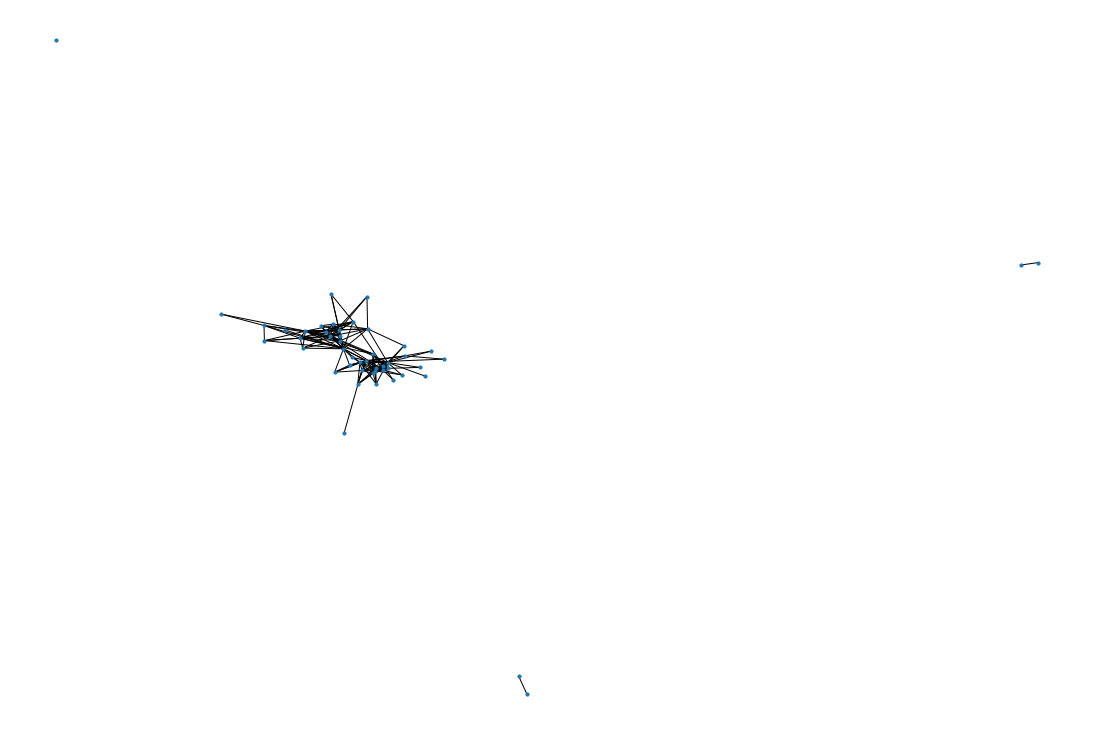

In [5]:
nx.draw(G, node_size = 10)
plt.show()

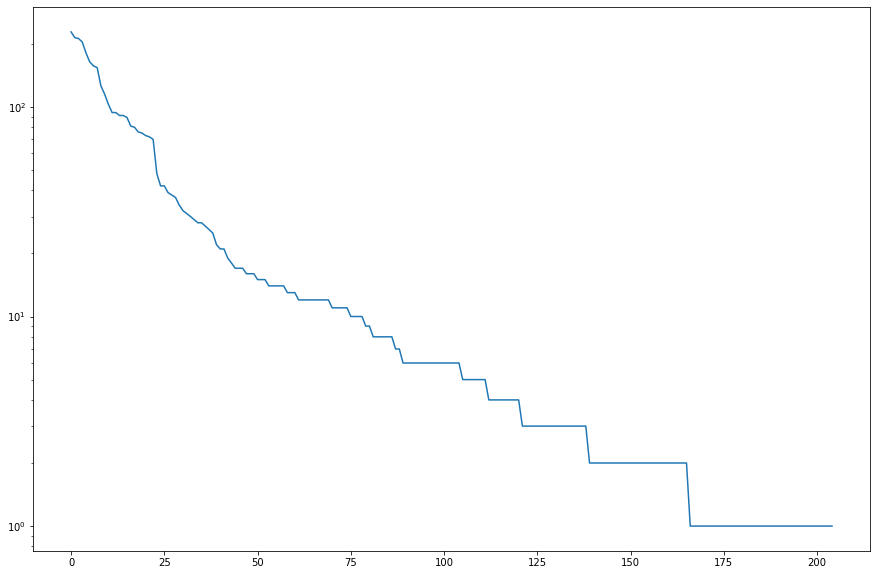

In [6]:
#edge weight distribution
plt.semilogy(sorted(list(nx.get_edge_attributes(G,'weight').values()), reverse = True))
plt.show()

In [7]:
#removing low-weight edges
for u,v in G.copy().edges():
    if G[u][v]['weight'] < 5:
        G.remove_edge(u,v)

In [8]:
H = [G.subgraph(cc) for cc in sorted(list(nx.connected_components(G)), key = lambda x: len(x))][-1]

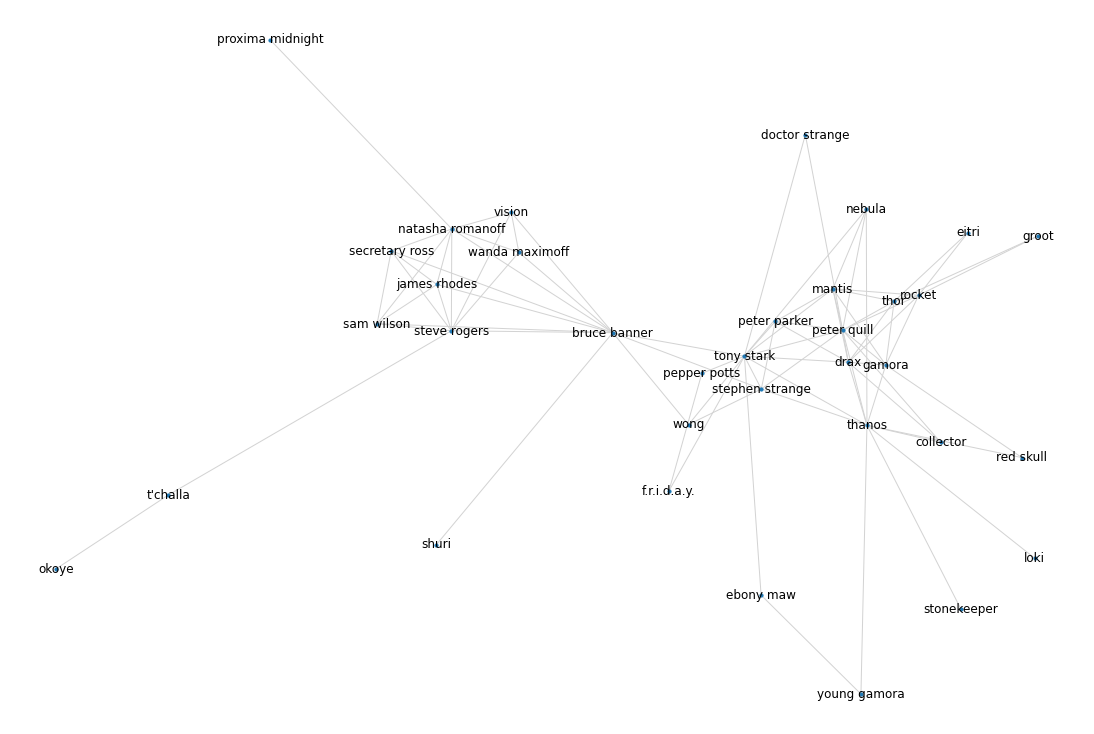

In [9]:
nx.draw(H, node_size = 10, with_labels = True, edge_color = '#d3d3d3')
plt.savefig('condensed_network.png')
plt.show()

In [10]:
#node degrees
sorted(list(H.degree()), key = lambda x: x[1], reverse = True)

[('tony stark', 15),
 ('peter quill', 14),
 ('thanos', 13),
 ('bruce banner', 13),
 ('drax', 11),
 ('mantis', 10),
 ('steve rogers', 10),
 ('thor', 9),
 ('rocket', 9),
 ('gamora', 9),
 ('stephen strange', 8),
 ('natasha romanoff', 8),
 ('peter parker', 7),
 ('secretary ross', 7),
 ('james rhodes', 7),
 ('vision', 6),
 ('wanda maximoff', 6),
 ('wong', 5),
 ('sam wilson', 5),
 ('collector', 5),
 ('ebony maw', 4),
 ('pepper potts', 4),
 ("t'challa", 4),
 ('eitri', 4),
 ('red skull', 4),
 ('nebula', 4),
 ('loki', 3),
 ('okoye', 3),
 ('stonekeeper', 3),
 ('f.r.i.d.a.y.', 2),
 ('groot', 2),
 ('young gamora', 2),
 ('doctor strange', 2),
 ('proxima midnight', 1),
 ('shuri', 1)]

In [11]:
deg_cent = degree_centrality(H)
deg_cent = {k: v for k, v in sorted(deg_cent.items(), key=lambda item: item[1], reverse = True)}
eigen_cent = eigenvector_centrality(H)
eigen_cent = {k: v for k, v in sorted(eigen_cent.items(), key=lambda item: item[1], reverse = True)}
bet_cent = betweenness_centrality(H)
bet_cent = {k: v for k, v in sorted(bet_cent.items(), key=lambda item: item[1], reverse = True)}

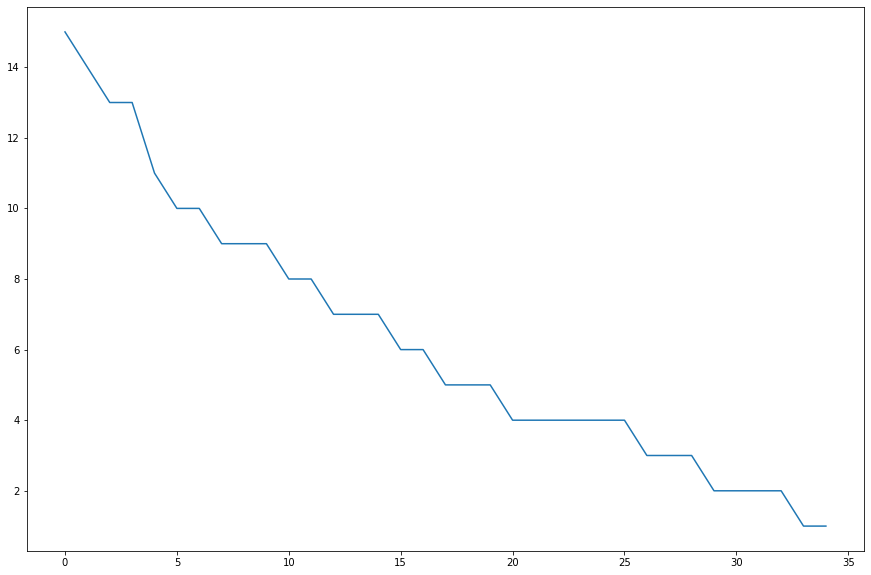

In [12]:
#distribution of node degree
plt.plot(sorted([H.degree(node) for node in H.nodes()], reverse = True))
plt.show()

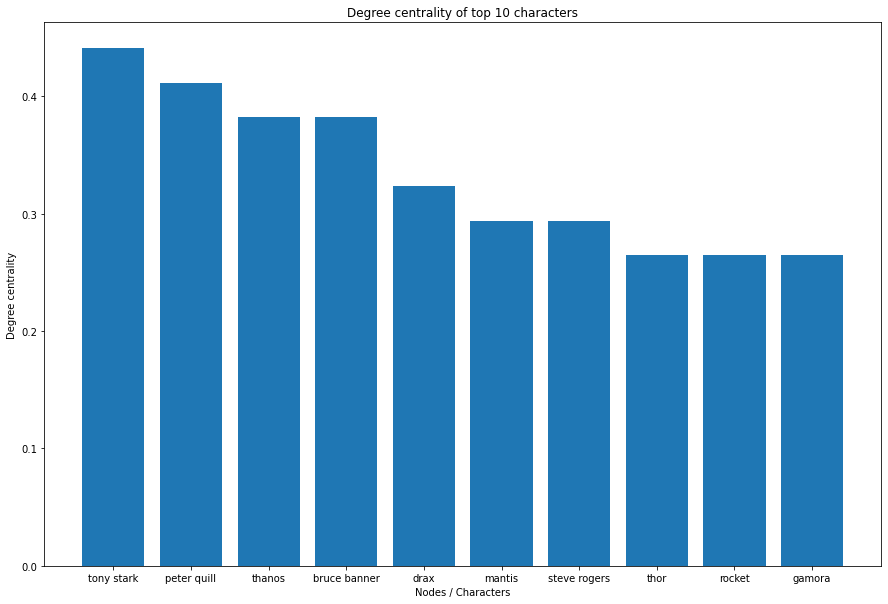

In [13]:
plt.title('Degree centrality of top 10 characters')
plt.ylabel('Degree centrality')
plt.xlabel('Nodes / Characters')
plt.bar(list(deg_cent.keys())[:10],list(deg_cent.values())[:10])
#plt.xticks(rotation = 70)
plt.savefig('degree_centrality.png')
plt.show()

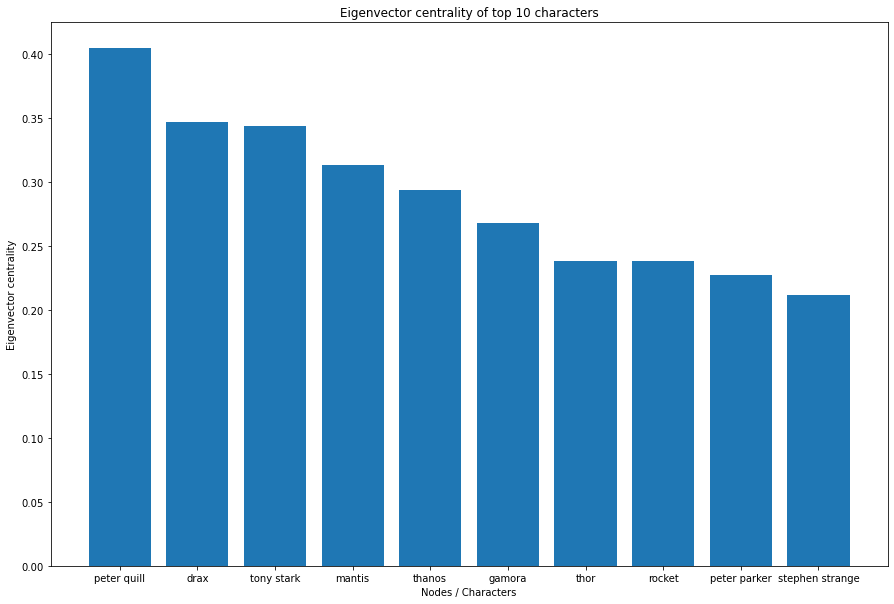

In [14]:
plt.title('Eigenvector centrality of top 10 characters')
plt.ylabel('Eigenvector centrality')
plt.xlabel('Nodes / Characters')
plt.bar(list(eigen_cent.keys())[:10],list(eigen_cent.values())[:10])
#plt.xticks(rotation = 70)
plt.savefig('eigen.png')
plt.show()

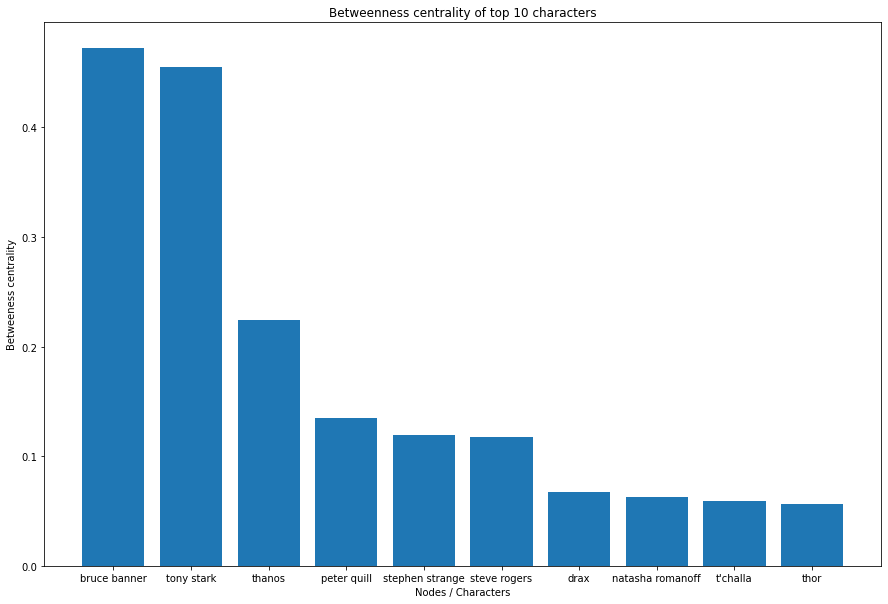

In [15]:
plt.title('Betweenness centrality of top 10 characters')
plt.ylabel('Betweeness centrality')
plt.xlabel('Nodes / Characters')
plt.bar(list(bet_cent.keys())[:10],list(bet_cent.values())[:10])
#plt.xticks(rotation = 70)
plt.savefig('betweenness.png')
plt.show()

In [16]:
# characters which appear in the same scene as Bruce Banner
H.adj['bruce banner']

AtlasView(FilterAtlas({'stephen strange': {'weight': 28}, 'tony stark': {'weight': 103}, 'bruce banner': {'weight': 39}, 'wong': {'weight': 6}, 'steve rogers': {'weight': 21}, 'secretary ross': {'weight': 6}, 'natasha romanoff': {'weight': 17}, 'james rhodes': {'weight': 12}, 'sam wilson': {'weight': 5}, 'wanda maximoff': {'weight': 14}, 'vision': {'weight': 12}, 'shuri': {'weight': 5}}, <function FilterAdjacency.__getitem__.<locals>.new_node_ok at 0x0000024A4D89EB80>))

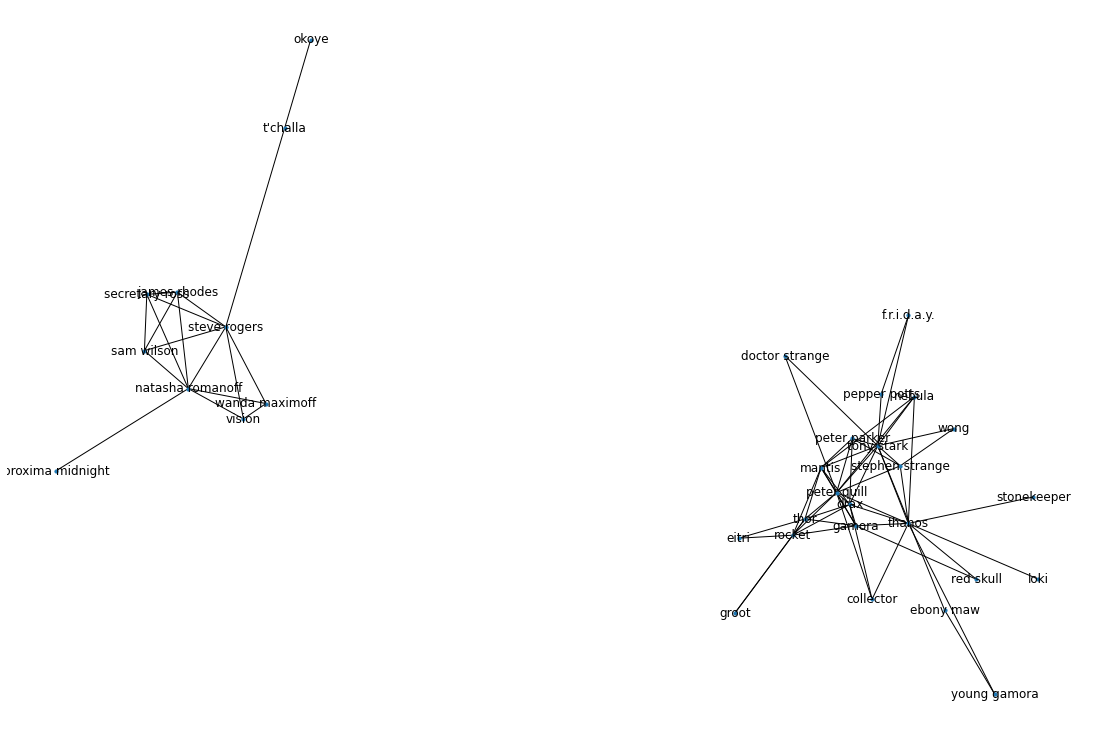

In [17]:
# removing Bruce Banner
H1 = H.copy()
H1.remove_node('bruce banner')
H1.remove_nodes_from(list(nx.isolates(H1))) 
nx.draw(H1, node_size = 10, with_labels = True)

In [18]:
list(nx.connected_components(H1))

[{'collector',
  'doctor strange',
  'drax',
  'ebony maw',
  'eitri',
  'f.r.i.d.a.y.',
  'gamora',
  'groot',
  'loki',
  'mantis',
  'nebula',
  'pepper potts',
  'peter parker',
  'peter quill',
  'red skull',
  'rocket',
  'stephen strange',
  'stonekeeper',
  'thanos',
  'thor',
  'tony stark',
  'wong',
  'young gamora'},
 {'james rhodes',
  'natasha romanoff',
  'okoye',
  'proxima midnight',
  'sam wilson',
  'secretary ross',
  'steve rogers',
  "t'challa",
  'vision',
  'wanda maximoff'}]

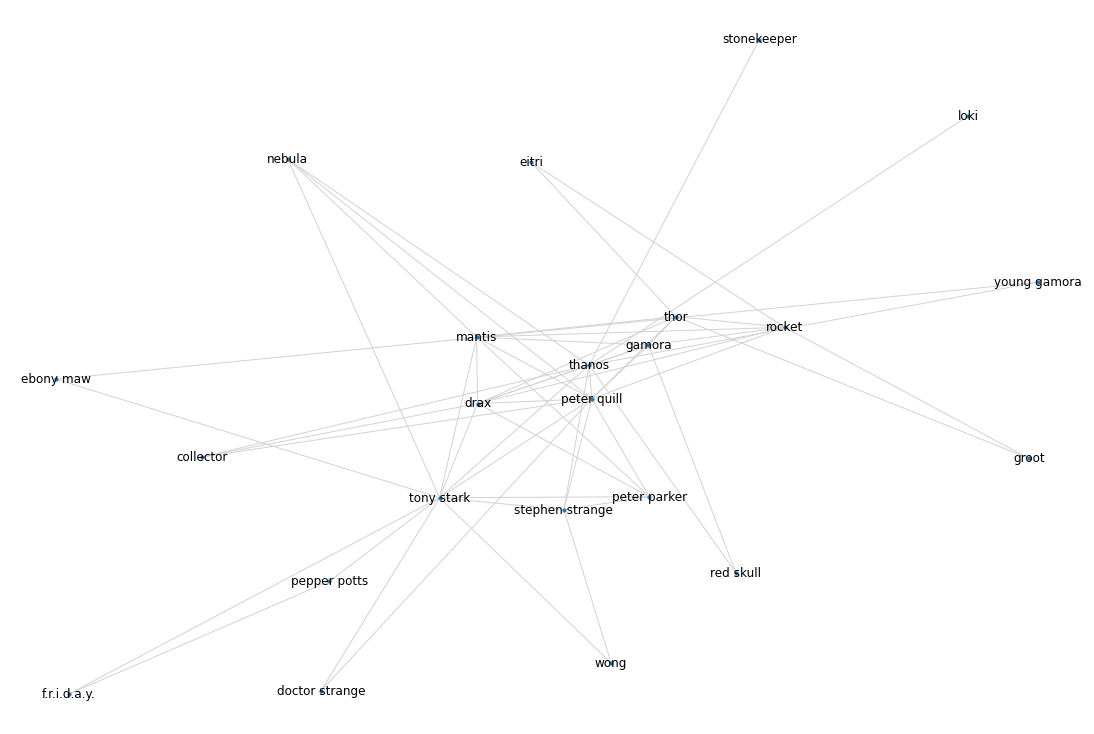

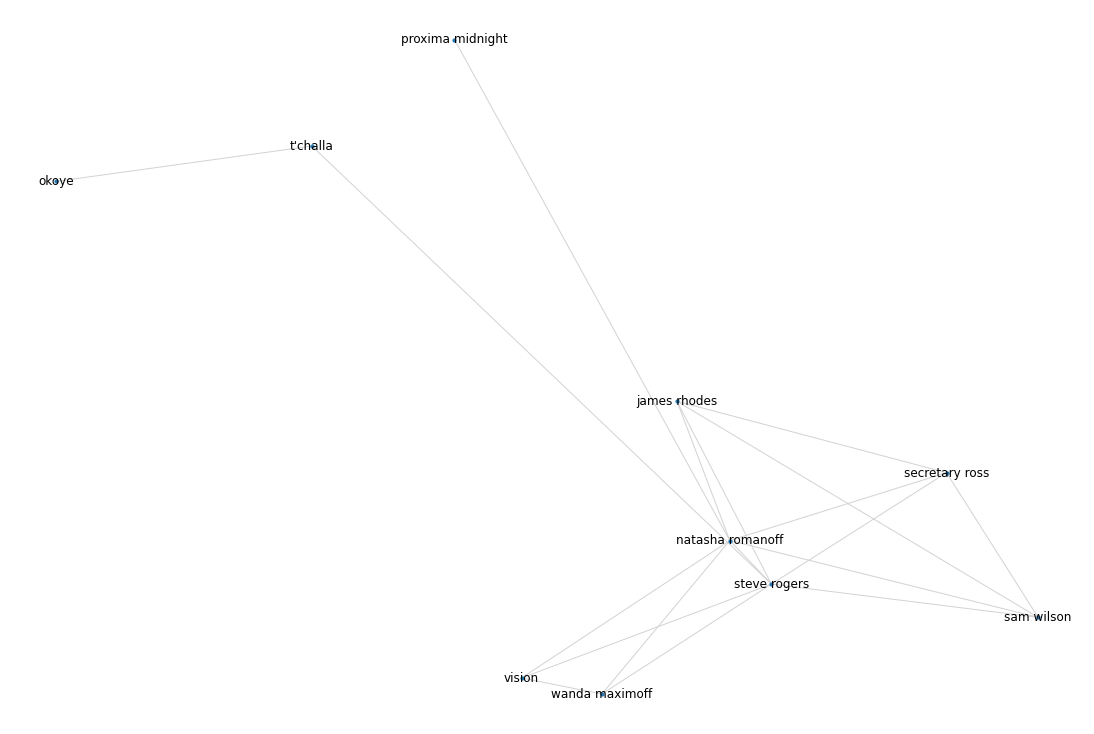

In [19]:
# two disjointed groups in the network after removal of Bruce Banner
for i,cc in enumerate(nx.connected_components(H1)):
    nx.draw(H1.subgraph(cc), node_size = 10, with_labels = True, edge_color = '#d3d3d3', pos = nx.fruchterman_reingold_layout(H1, k = 2))
    plt.savefig('cluster_'+str(i)+'.png')
    plt.show()